In [202]:
import librosa
import tensorflow as tf
print(tf.__version__)
import csv
import numpy as np
import matplotlib.pyplot as plt
import nltk
import os
import sys
from IPython.display import Audio

2.2.0


In [203]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [204]:
os.getcwd()

'/content'

In [0]:
filepath = "/content/gdrive/My Drive/cat/"
sound_path = filepath + '0ab3b47d_nohash_0.wav'

In [0]:

import os
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")

In [208]:

samples , sampling_rate = librosa.load(filepath+'0ab3b47d_nohash_0.wav',sr =None , mono =True , offset = 0.0 ,duration = None)

len(samples) , sampling_rate

(16000, 16000)

In [209]:
duration = len(samples)/sampling_rate
duration

1.0

In [210]:
Audio(sound_path)

In [0]:
# ipd.Audio(samples, rate=sample_rate)
# print(sample_rate)

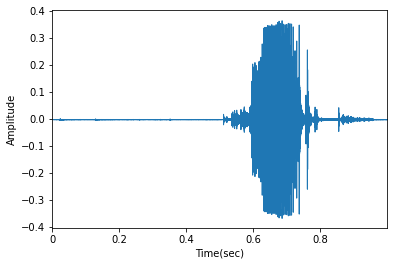

In [212]:
from librosa import display
plt.figure()
librosa.display.waveplot(y = samples , sr = sampling_rate)
plt.xlabel("Time(sec)")
plt.ylabel("Amplitude")
plt.show()

In [0]:
#this figure only tells us about time domain and its relation with loudness(amplitude) while which is morepronounced to get that frequency domain plot 
#so we need to use fourier transform

In [0]:

# def spectrogram(samples, sample_rate, stride_ms = 10.0, 
#                           window_ms = 20.0, max_freq = None, eps = 1e-14):

#     stride_size = int(0.001 * sample_rate * stride_ms)
#     window_size = int(0.001 * sample_rate * window_ms)

#     # Extract strided windows
#     truncate_size = (len(samples) - window_size) % stride_size
#     samples = samples[:len(samples) - truncate_size]
#     nshape = (window_size, (len(samples) - window_size) // stride_size + 1)
#     nstrides = (samples.strides[0], samples.strides[0] * stride_size)
#     windows = np.lib.stride_tricks.as_strided(samples, 
#                                           shape = nshape, strides = nstrides)
    
#     assert np.all(windows[:, 1] == samples[stride_size:(stride_size + window_size)])

#     # Window weighting, squared Fast Fourier Transform (fft), scaling
#     weighting = np.hanning(window_size)[:, None]
    
#     fft = np.fft.rfft(windows * weighting, axis=0)
#     fft = np.absolute(fft)
#     fft = fft**2
    
#     scale = np.sum(weighting**2) * sample_rate
#     fft[1:-1, :] *= (2.0 / scale)
#     fft[(0, -1), :] /= scale
    
#     # Prepare fft frequency list'0ab3b47d_nohash_0.wav'
#     freqs = float(sample_rate) / window_size * np.arange(fft.shape[0])
    
#     # Compute spectrogram feature
#     ind = np.where(freqs <= max_freq)[0][-1] + 1
#     specgram = np.log(fft[:ind, :] + eps)
#     return specgram

In [0]:
# ppx = spectrogram(samples , sample_rate, max_freq = 8000)

In [0]:
def graph_spectrogram(wav_file):
    rate, data = get_wav_info(wav_file)
    nfft = 200 # Length of each window segment
    fs = 8000 # Sampling frequencies
    noverlap = 120 # Overlap between windows
    nchannels = data.ndim
    if nchannels == 1:
        pxx, freqs, bins, im = plt.specgram(data, nfft, fs, noverlap = noverlap)
    elif nchannels == 2:
        pxx, freqs, bins, im = plt.specgram(data[:,0], nfft, fs, noverlap = noverlap)
    return pxx

# Load a wav file
def get_wav_info(wav_file):
    rate, data = wavfile.read(wav_file)
    return rate, data

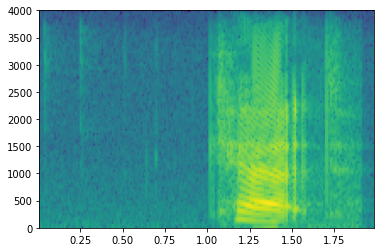

In [217]:
x = graph_spectrogram(sound_path)

In [218]:
np.array(x)

array([[1.08256922e-01, 2.28514548e-01, 1.08146758e-02, ...,
        6.79253741e-04, 2.40382843e-02, 8.35361382e-03],
       [1.18224309e-02, 3.50786769e-01, 1.23174517e-02, ...,
        4.48241640e-03, 3.38748005e-02, 9.83433411e-02],
       [8.90209563e-02, 1.06816699e-01, 8.24569958e-03, ...,
        1.56592871e-02, 3.55607877e-02, 5.26908699e-02],
       ...,
       [1.19994583e-04, 4.06695552e-05, 4.76853381e-06, ...,
        7.72045348e-06, 6.56591853e-06, 4.37169015e-05],
       [2.93025579e-05, 3.92375471e-05, 1.38934190e-05, ...,
        5.65130519e-06, 1.53565730e-05, 2.14599380e-05],
       [2.22466994e-06, 2.42859093e-05, 1.12464717e-07, ...,
        2.56375732e-06, 2.71802397e-06, 2.09314236e-07]])

In [0]:
word_to_idx = {"a":1 ,"b":2 ,"c":3 ,"d":4 ,"e":5 ,"f":6 ,"g":7 ,"h":8 ,"i":9 ,"j": 10, "k" :11,"l":12 ,"m":13 ,"n":14 ,"o":15 ,"p":16 ,"q":17 ,"r":18 ,"s":19 ,"t":20 ,"u":21,"v":22,"w":23 ,"x":24 ,"y":25 ,"z":26 ,"_":27 ," ": 28 }
idx_to_word = dict([(key , value) for (value ,key) in word_to_idx.items() ])

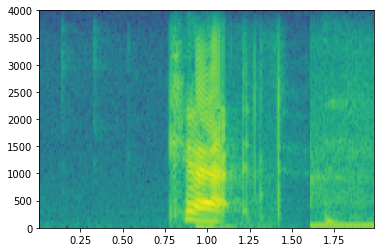

In [220]:
##now import training example 

X_Train = []
Y_Train = []

waves = [f for f in os.listdir(filepath) if f.endswith('.wav')]
for wav in waves:
  sample = graph_spectrogram(filepath + wav)
  if sample.shape == (101,198):

    # sample = sample.reshape(101*198,1)
    X_Train.append(sample)
    Y_Train.append(0)

In [0]:
# Y_Train = np.array(Y_Train)
# X_Train = np.array(X_Train)
# print(len(X_Train),len(Y_Train))
# input_length = 198
# label_length = 3
# import keras.backend as K
# def ctc_loss(y_true, y_pred):
#     print(y_pred)
#     return K.ctc_batch_cost(y_true, y_pred, input_length, label_length)

# eos_index = 28
# def ctc_find_eos(y_true, y_pred):

#     #convert y_pred from one-hot to label indices
#     y_pred_ind = K.argmax(y_pred, axis=-1)

#     #to make sure y_pred has one end_of_sentence (to avoid errors)
#     y_pred_end = K.concatenate([
#                                   y_pred_ind[:,:-1], 
#                                   eos_index * K.ones_like(y_pred_ind[:,-1:])
#                                ], axis = 1)

#     #to make sure the first occurrence of the char is more important than subsequent ones
#     occurrence_weights = K.arange(start = max_length, stop=0, dtype=K.floatx())

#     #is eos?
#     is_eos_true = K.cast_to_floatx(K.equal(y_true, eos_index))
#     is_eos_pred = K.cast_to_floatx(K.equal(y_pred_end, eos_index))

#     #lengths
#     true_lengths = 1 + K.argmax(occurrence_weights * is_eos_true, axis=1)
#     pred_lengths = 1 + K.argmax(occurrence_weights * is_eos_pred, axis=1)

#     #reshape
#     true_lengths = K.reshape(true_lengths, (-1,1))
#     pred_lengths = K.reshape(pred_lengths, (-1,1))

#     return K.ctc_batch_cost(y_true, y_pred, pred_lengths, true_lengths)

In [0]:
from keras.callbacks import ModelCheckpoint
from keras.models import Model, load_model, Sequential
from keras.layers import Dense, Activation, Dropout, Input, Masking, TimeDistributed, LSTM, Conv1D
from keras.layers import GRU, Bidirectional, BatchNormalization, Reshape
from keras.optimizers import Adam

In [223]:
len(Y_Train)

264

In [224]:
X_Train[112].shape

(101, 198)

In [225]:
print(len(X_Train))

264


In [0]:
# from keras.preprocessing import sequence
# from keras.models import Sequential, Model
# from keras.layers import Dense, Embedding , Activation, LSTM 
# from keras.initializers import glorot_uniform
# from keras.utils import to_categorical
# from keras.optimizers import Adam
# from keras import backend as K
# from keras.layers import Input,Lambda,Reshape,Flatten,Lambda

# X_input = Input(shape = (101,198))

# X =Conv1D(filters=196,kernel_size=15,strides=4)(X_input)                                  
# X = BatchNormalization()(X)                                
# X = Activation("relu")(X)                                 
# X = Dropout(rate = 0.8)(X)

# X = GRU(units=128, return_sequences = True)(X)                                
# X = Dropout(rate = 0.8)(X)                              
# X = BatchNormalization()(X)

# X = Dropout(rate = 0.8)(X)

# # X = Flatten()(X)

# # X = Lambda()

# # X = Dense(1 , activation='sigmoid')(X)

# X = TimeDistributed(Dense(30, activation = "sigmoid"))(X)

# model = Model(inputs = X_input, outputs = X) 

# model.compile(loss= ctc_find_eos,optimizer='adam',metrics=['accuracy'])
# model.summary()

# num_epochs = 3
# MODEL = model.fit(X_Train , Y_Train , epochs = num_epochs)

In [0]:
import numpy as np

#%%
# From Baidu ba-dls-deepspeech - https://github.com/baidu-research/ba-dls-deepspeech
# Character map list

char_map_str = """
<SPACE> 0
a 1
b 2
c 3
d 4
e 5
f 6
g 7
h 8
i 9
j 10
k 11
l 12
m 13
n 14
o 15
p 16
q 17
r 18
s 19
t 20
u 21
v 22
w 23
x 24
y 25
z 26
' 27
"""

char_map = {}
index_map = {}

for line in char_map_str.strip().split('\n'):
    ch, index = line.split()
    char_map[ch] = int(index)
    index_map[int(index)] = ch

index_map[0] = ' '

#%%
def text_to_int(text):
    """
    takes the character map and returns a series of 
    integers for the inserted text
    the 'silence' class returns only 27's
    """
    int_seq = []
    if text == 'silence':
        for r in range(8):
            int_seq.append(27)
    else:
        for c in text:
            ch = char_map[c]
            int_seq.append(ch)
    return int_seq
        
def get_intseq(trans, max_len = 23):
    """
    pads integer list with 27's up to max length
    """
    t = text_to_int(trans)
    while (len(t) < max_len):
        t.append(27)
    return t

def get_ctc_params(Y, classes_list, len_char_map = 28):
    """
    Usage:
        creates parameters required for K.ctc_batch_cost function 
    Args:
        Y (ndarray): target set with all classes
        classes_list (list): list with class names
        len_char_map (int): length of the character map
    Returns:
        3 ndarrays
    """
    labels = np.array([get_intseq(classes_list[Y[l]]) for l, _ in enumerate(Y)])
    input_length = np.array([23 for _ in Y])
    label_length = np.array([23 for _ in Y])
    return labels, input_length, label_length


In [228]:
# labels = np.array([get_intseq(all_classes[Y_Train[l]]) for l, _ in enumerate(Y_Train)])
labels.shape

(264, 23)

In [0]:
from keras.layers import *
from keras.layers.wrappers import TimeDistributed
from keras.layers.merge import Add
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras import backend as K
from keras.utils import plot_model

def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args    
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length )    
    
        
#%%
class CTC():
    """
    Usage:
        sr_ctc = CTC(enter input_size and output_size)
        sr_ctc.build()
        sr_ctc.m.compile()
        sr_ctc.tm.compile()
    """       
    def __init__(self,
                 input_size=None, 
                 output_size=None,
                 initializer='glorot_uniform'):
        self.input_size = input_size
        self.output_size = output_size
        self.initializer = initializer
        self.m = None
        self.tm = None
                   
    def build(self, 
              conv_filters = 196,
              conv_size = 13,
              conv_strides = 4,
              act = 'relu',
              rnn_layers = 2,
              LSTM_units = 128,
              drop_out = 0.8):
           
        i = Input(shape = self.input_size, name = 'input')
        x = Conv1D(conv_filters, 
                   conv_size, 
                   strides = conv_strides, 
                   name = 'conv1d')(i)
        x = BatchNormalization()(x)
        x = Activation(act)(x)
        for _ in range(rnn_layers):          
            x = Bidirectional(LSTM(LSTM_units, 
                                   return_sequences = True))(x)
            x = Dropout(drop_out)(x)
            x = BatchNormalization()(x)
        y_pred = TimeDistributed(Dense(self.output_size, 
                                       activation = 'softmax'))(x)        
        # ctc inputs
        labels = Input(name='the_labels', shape=[None,], dtype='int32')
        input_length = Input(name='input_length', shape=[1], dtype='int32')
        label_length = Input(name='label_length', shape=[1], dtype='int32')    
        # Keras doesn't currently support loss funcs with extra parameters
        # so CTC loss is implemented in a lambda layer
        loss_out = Lambda(ctc_lambda_func, 
                          output_shape=(1,), 
                          name='ctc')([y_pred,
                                        labels,
                                        input_length,
                                        label_length])        
        self.tm = Model(inputs = i,
                        outputs = y_pred)
        self.m = Model(inputs = [i, 
                                 labels, 
                                 input_length, 
                                 label_length], 
                        outputs = loss_out)
        return self.m, self.tm


In [0]:
# from models import CTC, ctc_lambda_func #used in the CTC build method
# from ctc_utils import char_map, index_map, text_to_int, get_intseq, get_ctc_params
all_classes = [ 'cat','yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go', 'silence', 'house', 'nine', 'four', 'happy', 'wow', 'five', 'zero', 'tree', 'six', 'one', 'three', 'eight', 'two', 'seven', 'marvin', 'dog', 'sheila', 'bed', 'bird']


In [0]:
def ctc(y_true, y_pred):
    return y_pred

In [232]:
sr_ctc = CTC((101,198), 28)
sr_ctc.build()

(<keras.engine.training.Model at 0x7ffa0defbe10>,
 <keras.engine.training.Model at 0x7ffa0df00dd8>)

In [233]:
sr_ctc.m.summary()

Model: "model_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 101, 198)     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 23, 196)      504700      input[0][0]                      
__________________________________________________________________________________________________
batch_normalization_33 (BatchNo (None, 23, 196)      784         conv1d[0][0]                     
__________________________________________________________________________________________________
activation_12 (Activation)      (None, 23, 196)      0           batch_normalization_33[0][0]     
___________________________________________________________________________________________

In [0]:
sr_ctc.m.compile(loss = ctc, optimizer = 'adam', metrics = ['accuracy'])
sr_ctc.tm.compile(loss = ctc, optimizer = 'adam')


In [235]:
labels, input_length, label_length = get_ctc_params(Y = Y_Train, classes_list = all_classes)
labels_val, input_length_val, label_length_val = get_ctc_params(Y = Y_Train, classes_list = all_classes)
print("labels" ,labels.shape ," ",input_length ," ", label_length)

labels (264, 23)   [23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23]   [23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 2

In [0]:
history = sr_ctc.m.fit([X_Train, 
                            labels, 
                            input_length, 
                            label_length], 
                       np.zeros([len(labels)]), 
                       batch_size = 128, 
                       epochs = 100, 
                       validation_data = ([X_Train, 
                                           labels_val, 
                                           input_length_val, 
                                           label_length_val],
                                          np.zeros([len(labels_val)])), 
                      #  callbacks = [checkpointer], 
                       verbose = 1
                      #  , shuffle = True
                       )

Train on 264 samples, validate on 264 samples
Epoch 1/100
264/264 [==============================] - 4s 16ms/step - loss: 67.4256 - accuracy: 0.0000e+00 - val_loss: 55.1902 - val_accuracy: 0.0000e+00
Epoch 2/100
264/264 [==============================] - 2s 7ms/step - loss: 44.7116 - accuracy: 0.0000e+00 - val_loss: 44.1512 - val_accuracy: 0.0000e+00
Epoch 3/100
264/264 [==============================] - 2s 7ms/step - loss: 27.1834 - accuracy: 0.0000e+00 - val_loss: 34.9466 - val_accuracy: 0.0000e+00
Epoch 4/100
264/264 [==============================] - 2s 7ms/step - loss: 16.9577 - accuracy: 0.0000e+00 - val_loss: 28.5675 - val_accuracy: 0.0000e+00
Epoch 5/100
264/264 [==============================] - 2s 7ms/step - loss: 11.2690 - accuracy: 0.0000e+00 - val_loss: 23.8237 - val_accuracy: 0.0000e+00
Epoch 6/100
264/264 [==============================] - 2s 7ms/step - loss: 8.3546 - accuracy: 0.0000e+00 - val_loss: 20.1783 - val_accuracy: 0.0000e+00
Epoch 7/100
264/264 [===============

In [0]:
import os
import itertools
import codecs
import re
import datetime
import cairocffi as cairo
import editdistance
import numpy as np
from scipy import ndimage
import pylab
from keras import backend as K
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Input, Dense, Activation
from keras.layers import Reshape, Lambda
from keras.layers.merge import add, concatenate
from keras.models import Model
from keras.layers.recurrent import GRU
from keras.optimizers import SGD
from keras.utils.data_utils import get_file
from keras.preprocessing import image
import keras.callbacks

In [0]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.callbacks import Callback
from tensorflow.python.keras.layers import *
from tensorflow.python.keras.optimizers import Adam, SGD
from tensorflow.python.keras.activations import relu
from tensorflow.python.keras.metrics import categorical_accuracy, mean_squared_error
from tensorflow.python.keras.callbacks import BaseLogger, ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.initializers import Ones, Zeros, glorot_normal
from tensorflow.python.framework import tensor_shape
# from data_genration import DataGenerator

import numpy as np


In [0]:
 def clipped_relu(x):
     return relu(x, max_value=20)

def ctc_lambda_func(args):
    labels, y_pred, input_length, label_length = args
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

def ctc(y_true, y_pred):
    return y_pred



def get_speech_model():
    model = Sequential()
    
    # Batch normalize the input
    model.add(BatchNormalization(axis=-1, input_shape=(None, 128), name='BN_1'))
    
    # 1D Convs
    model.add(Conv1D(512, 5, strides=1, activation=clipped_relu, name='Conv1D_1'))
    model.add(Conv1D(512, 5, strides=1, activation=clipped_relu, name='Conv1D_2'))
    model.add(Conv1D(512, 5, strides=2, activation=clipped_relu, name='Conv1D_3'))
    
    # Batch Normalization
    model.add(BatchNormalization(axis=-1, name='BN_2'))
    
    # BiRNNs
    model.add(Bidirectional(SimpleRNN(1280, return_sequences=True, name='BiRNN_1'), merge_mode='sum'))
    model.add(Bidirectional(SimpleRNN(1280, return_sequences=True, name='BiRNN_2'), merge_mode='sum'))
    model.add(Bidirectional(SimpleRNN(1280, return_sequences=True, name='BiRNN_3'), merge_mode='sum'))
    model.add(Bidirectional(SimpleRNN(1280, return_sequences=True, name='BiRNN_4'), merge_mode='sum'))
    model.add(Bidirectional(SimpleRNN(1280, return_sequences=True, name='BiRNN_5'), merge_mode='sum'))
    model.add(Bidirectional(SimpleRNN(1280, return_sequences=True, name='BiRNN_6'), merge_mode='sum'))
    model.add(Bidirectional(SimpleRNN(1280, return_sequences=True, name='BiRNN_7'), merge_mode='sum'))
    
    # Batch Normalization
    model.add(BatchNormalization(axis=-1, name='BN_3'))
    
    # FC
    model.add(TimeDistributed(Dense(1024, activation=clipped_relu, name='FC1')))
    model.add(TimeDistributed(Dense(29, activation='softmax', name='y_pred')))
    return model

def get_trainable_speech_model():
    model = get_speech_model()
    y_pred = model.outputs[0]
    model_input = model.inputs[0]
    
    model.summary()
    
    labels = Input(name='the_labels', shape=[None,], dtype='int32')
    input_length = Input(name='input_length', shape=[1], dtype='int32')
    label_length = Input(name='label_length', shape=[1], dtype='int32')

    loss_out = Lambda(ctc_lambda_func, name='ctc')([labels, y_pred, input_length, label_length])
    trainable_model = Model(inputs=[model_input, labels, input_length, label_length], outputs=loss_out)
    return trainable_model

In [0]:
model = get_trainable_speech_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
BN_1 (BatchNormalization)    (None, None, 128)         512       
_________________________________________________________________
Conv1D_1 (Conv1D)            (None, None, 512)         328192    
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, None, 512)         1311232   
_________________________________________________________________
Conv1D_3 (Conv1D)            (None, None, 512)         1311232   
_________________________________________________________________
BN_2 (BatchNormalization)    (None, None, 512)         2048      
_________________________________________________________________
bidirectional (Bidirectional (None, None, 1280)        4590080   
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 1280)        6

In [0]:
OUTPUT_DIR = 'asr_model'

class sequence_generator(keras.callbacks.Callback):
  def __init__():
    pass
  def get_output_size(self):
    pass
  def get_batch(self, index , train):
    inputs = {'the_input': X_data,
                  'the_labels': labels,
                  'input_length': input_length,
                  'label_length': label_length,
                  'source_str': source_str  # used for visualization only
                  }
    outputs = {'ctc': np.zeros([size])}  # dummy data for dummy loss function
    return (inputs, outputs)

  def next_train(self):
    pass
  
  def next_val(self):
    pass

  def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    # the 2 is critical here since the first couple outputs of the RNN
    # tend to be garbage:
    y_pred = y_pred[:, 2:, :]
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

  def decode_batch(test_func, word_batch):
      out = test_func([word_batch])[0]
      ret = []
      for j in range(out.shape[0]):
          out_best = list(np.argmax(out[j, 2:], 1))
          out_best = [k for k, g in itertools.groupby(out_best)]
          outstr = labels_to_text(out_best)
          ret.append(outstr)
      return ret


  
  


  



In [0]:
os.chdir("/content/gdrive/My Drive")
!unzip dev-clean.tar.gz -d data/

Archive:  dev-clean.tar.gz
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of dev-clean.tar.gz or
        dev-clean.tar.gz.zip, and cannot find dev-clean.tar.gz.ZIP, period.


In [0]:
os.listdir()

['fingers.jpg',
 'vk.jpg',
 '20140215_142633.jpg',
 'IMG_20161111_184654.jpg',
 'IMG_20161108_205430.jpg',
 'IMG_20161029_164835.jpg',
 'FB_IMG_14659731559508533.jpg',
 'History.docx',
 'https:  googlew.txt',
 'Screenshot_2017-12-20-12-10-34-639_com.jio.join.png',
 'FileHandler.pdf',
 '441441.pdf',
 'IMG_20190822_141423.jpg',
 'story (1).txt',
 'eng112.pptm',
 'eng112 (1).pptm',
 'Friday, August 9, 2019(0)mth101a morning.gdoc',
 'story.txt',
 'Wednesday, September 4, 2019(MTH101A) moring.gdoc',
 'IMG_20191102_134831_608.jpg',
 'WhatsApp Image 2019-11-01 at 5.05.11 PM.jpeg',
 'cv1190946.ipynb',
 'Screenshot from 2019-12-15 08-49-44.png',
 'husky_highlevel_controller.zip',
 'husky_highlevel_controller - Varun Khatri.zip',
 'talker.cpp',
 'talker - Varun Khatri.cpp',
 'Untitled Jam (3)',
 'TA101A Course Material',
 'web.cse.iitk.ac.in',
 'AERIAL ROBOTICS PROJECT',
 'AERIAL ROBOTICS ',
 'Snapchat',
 'ACA PROJECT',
 'Untitled document (9).gdoc',
 'ros files',
 'iris_base.xacro',
 'Untitled 